In [1]:
from get_parameters import *
from InitializeDict_M_Coeff import *
from optimization_problems import * 
from transfer_classifiers import * 


In [ ]:
# masks_paths=get_lists_of_of_paths(path_to_images)

# roi_masks=[]
# segm_masks=[]
# for j in range(len(masks_paths)):
#     mid_file=get_lists_of_of_paths(masks_paths[j])
#     roi_masks.append(np.load(mid_file[3]))

#     segm_mask = sitk.ReadImage(mid_file[1], sitk.sitkFloat32)
#     segm_masks.append(sitk.GetArrayFromImage(segm_mask))


In [ ]:
# for path in get_lists_of_of_paths('./subjects'):
#     image = sitk.ReadImage(path)
#     image_array = (sitk.GetArrayFromImage(image)).reshape(384,384)




# mri_files=get_lists_of_of_paths('./subjects')

# print(mri_files)
# image_paths=[]
# mri_images=[]
# for j in range(44,100): #len(mri_files)):
#     mid_file=get_lists_of_of_paths(mri_files[j])
#     image_paths.append(get_lists_of_of_paths(mid_file[0]))
#     for i in range(160):   
#         image = sitk.ReadImage(image_paths[j][0])
#         image_array = (sitk.GetArrayFromImage(image)).reshape(384,384)
#         name = "./MRI_Arrays/" + mri_files[j][-7:] + ".npy" 
#         np.save(name, image_array)
    

In [12]:
# masks_paths=get_lists_of_of_paths("./masks")
# for j in range(len(masks_paths)):
#     mid_file=get_lists_of_of_paths(masks_paths[j])
#     roi_mask = np.load(mid_file[3])
#     name = "./roi_masks_dataset/roi_" + masks_paths[j][-7:] + ".npy" 
#     np.save(name, roi_mask)


#     segm_mask = sitk.ReadImage(mid_file[1], sitk.sitkFloat32)
#     segm_mask_1 = sitk.GetArrayFromImage(segm_mask)
#     name = "./segm_masks_dataset/segm_" + masks_paths[j][-7:] + ".npy" 
#     np.save(name, segm_mask_1)

In [2]:

def makeshiftSIFT(array3d, x_coordinate, y_coordinate, z_coordinate ):

    XYaxis=array3d[:,:,z_coordinate].astype('uint8')
    XZaxis=array3d[:,y_coordinate,:].astype('uint8')
    YZaxis=array3d[x_coordinate,:,:].astype('uint8')
    # gray = cv2.cvtColor(XYaxis, cv2.COLOR_BGR2GRAY)
    keypoint1= cv2.KeyPoint(x_coordinate, y_coordinate, 1)
    _, descriptor1 = sift.compute(XYaxis, [keypoint1] )


    # gray = cv2.cvtColor(XZaxis, cv2.COLOR_BGR2GRAY)
    keypoint2= cv2.KeyPoint(x_coordinate, z_coordinate, 1)
    _, descriptor2 = sift.compute(XZaxis,[keypoint2])

    # gray = cv2.cvtColor(XZaxis, cv2.COLOR_BGR2GRAY)
    keypoint3= cv2.KeyPoint(y_coordinate, z_coordinate, 1)
    _, descriptor3 = sift.compute(XZaxis,[keypoint3])


    descriptor = descriptor1 + descriptor2 + descriptor3 
    descriptor = descriptor / 3

    return descriptor

In [81]:

def compute_descriptors1(image, segmetation_mask, name):

    FBlistofCoordinates=[]
    FAClistofCoordinates=[]
    TBlistofCoordinates=[]
    TAClistofCoordinates=[]
    image=image
    name=name
    # for y in range(150,275,3):
    #     for x in range(70,250,3):
    #         for z in range(30,120,3):
    #             if (segmetation_mask1[x,y,z]==1
    #                 and segmetation_mask2[x,y,z]!=0
    #                 and segmetation_mask3[x,y,z]!=0
    #                 and segmetation_mask4[x,y,z]!=1):
    #                 FBlistofCoordinates.append([x,y,z])
    #             elif (segmetation_mask1[x,y,z]==2
    #                 and segmetation_mask2[x,y,z]!=2
    #                 and segmetation_mask3[x,y,z]!=2
    #                 and segmetation_mask4[x,y,z]!=2):
    #                 FAClistofCoordinates.append([x,y,z])
    #             elif (segmetation_mask1[x,y,z]==3
    #                 and segmetation_mask2[x,y,z]!=3
    #                 and segmetation_mask3[x,y,z]!=3
    #                 and segmetation_mask4[x,y,z]!=3):
    #                 TBlistofCoordinates.append([x,y,z])
    #             elif (segmetation_mask1[x,y,z]==4
    #                 and segmetation_mask2[x,y,z]!=4
    #                 and segmetation_mask3[x,y,z]!=4
    #                 and segmetation_mask4[x,y,z]!=4):
    #                 TAClistofCoordinates.append([x,y,z])
    


    ListOfCoordinates=[]

    # for i in range(len(TAClistofCoordinates)):
    #     ListOfCoordinates.append(TAClistofCoordinates[i])

    
    # for i in range(len(TBlistofCoordinates)):
    #     ListOfCoordinates.append(TBlistofCoordinates[i])

    # for i in range(len(FAClistofCoordinates)):
    #     ListOfCoordinates.append(FAClistofCoordinates[i])

    # for i in range(len(FBlistofCoordinates)):
    #     ListOfCoordinates.append(FBlistofCoordinates[i])    

    for y in range(150,275,3):
        for x in range(70,250,3):
            for z in range(30,120,3):
                if segmetation_mask[x,y,z]==1:
                    FBlistofCoordinates.append([x,y,z])
                elif segmetation_mask[x,y,z]==2:
                    FAClistofCoordinates.append([x,y,z])
                elif segmetation_mask[x,y,z]==3:
                    TBlistofCoordinates.append([x,y,z])
                elif segmetation_mask[x,y,z]==4:
                    TAClistofCoordinates.append([x,y,z])



    # (np.array(TAClistofCoordinates),np.array(TBlistofCoordinates),np.array(FAClistofCoordinates),
    #                                   np.array(FBlistofCoordinates)), axis=0)


    # ListOfCoordinates = np.random.permutation(ListOfCoordinates.shape[0])

    for i in ( 500, 1000, 7000, 13000):
        append_to_coordinates(ListOfCoordinates,TBlistofCoordinates, i) 
    for i in (0, 120, 240, 350, 480, 600, 710, 820 ,930, 1000):
        append_to_coordinates(ListOfCoordinates,TAClistofCoordinates, i)
    for i in (0, 120, 300, 500, 750, 900, 1100, 1300, 1400, 1575):
        append_to_coordinates(ListOfCoordinates,FAClistofCoordinates, i)
    for i in (1500, 2800, 5000, 11000):
        append_to_coordinates(ListOfCoordinates,FBlistofCoordinates, i)
    

    return  ListOfCoordinates



In [ ]:

# def get_images(path_to_images):    
#     mri_files=get_lists_of_of_paths(path_to_images)
#     image_paths=[]
#     mri_images=[]
#     j=0
#     for j in range(44,len(mri_files)):
#         mid_file=get_lists_of_of_paths(mri_files[j])
#         image_paths.append(get_lists_of_of_paths(mid_file[0]))
#         for i in range(160):
#             if i==0:    
#                 image = sitk.ReadImage(image_paths[j][0])
#                 image_array = (sitk.GetArrayFromImage(image)).reshape(384,384)
#             else:  
#                 image = sitk.ReadImage(image_paths[j][i])
#                 image_staging= sitk.GetArrayFromImage(image).reshape(384,384)
#                 image_array=np.dstack((image_array,image_staging))
#         name = "MRI_Dataset/" + mri_files[j][-7 :] + ".npy"
#         np.save(name,image_array)
        
#     # return image_array
#         # mri_images.append(image_array)



# get_images("./subjects")

# print("shape: " , str(np.load("MRI_Dataset/9002817.npy").shape)) , "\nUnique: " , str(np.unique(np.load("MRI_Dataset/9002817.npy")))

In [83]:

# for i in range(3, 43):
image=(get_lists_of_of_paths("./MRI_Dataset")[0])
name_cache = image[-11:-4]
image_test = np.load(image)
mask1 = np.load("./segm_masks_dataset/segm_"+name_cache+".npy")


Coordinates =compute_descriptors1(image_test,mask1, name_cache )
# print(len(Coordinates))
np.save("Sampled_Coordinates.npy", Coordinates)

In [84]:
k=0
image_descriptor=[]
Coordinates_file=np.load("./Sampled_Coordinates.npy")
Coordinates_file=Coordinates_file.tolist()
for coordinate in Coordinates_file:
    local_descriptor = makeshiftSIFT(image_test, coordinate[0], coordinate[1], coordinate[2])
    temp_name= "./local_descriptors/image_descriptor_" + name_cache + "_" + str(k)
    np.save(temp_name, local_descriptor)
    k+=1


In [3]:
Coordinates=np.load("Sampled_Coordinates.npy")
Coordinates=Coordinates.tolist()
# for coordinate in Coordinates:
    # print(coordinate[0])

In [ ]:


def compute_descriptors_B(image, segmetation_mask, name):
    k=0
    for coordinate in Coordinates:
        local_descriptor = makeshiftSIFT(image, coordinate[0], coordinate[1], coordinate[2])
        temp_name= "./local_descriptors/image_descriptor_" + name + "_" + str(k)
        np.save(temp_name, local_descriptor)
        k+=1



for i in range(0,100):
    image=(get_lists_of_of_paths("./MRI_Dataset")[i])
    name_cache = image[-11:-4]
    print(name_cache)
    image_test = np.load(image)
    mask = np.load("./segm_masks_dataset/segm_"+name_cache+".npy")
    # Coordinates = compute_descriptors(image_test,mask, name_cache )
    compute_descriptors_B(image_test, mask, name_cache)


#     9001104
# 9002430
# 9002817
# 9004175
# 9005132
# 9006723
# 9007827
# 9011115
# 9011420
# 9013161
# 9013798


In [109]:
print(len(get_lists_of_of_paths("./local_descriptors"))/1800)

21.004444444444445


In [101]:
# print(Coordinates)
# np.save("Sampled_Coordinates.npy",np.array(Coordinates))

In [102]:
# print(np.load("Sampled_Coordinates.npy"))

[[ 70 150  42]
 [ 70 150  45]
 [ 70 150  48]
 ...
 [166 258  54]
 [166 258  99]
 [166 258 102]]


In [4]:

def image_specific_SVM(coordinates, descriptors, array_with_labels):

    X=descriptors
    Y=[array_with_labels[coordinate[0], coordinate[1], coordinate[2]] for coordinate in coordinates]
    

    x_train=X[0:800]
    y_train=Y[0:1400]
    y_test=Y[1400:1800]

    # defining parameter range
    param_grid = {'C': [0.1, 1, 10, 100, 1000],  
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['rbf', 'poly']
                } 
    
    grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3, cv=5 )
    
    # fitting the model for grid search
    grid.fit(x_train, y_train)

    classifier = grid.best_estimator_
    classifier.fit(x_train, y_train)
    W = classifier.coeff_

    return W

In [ ]:
# w_901104 = image_specific_SVM()

In [5]:
# # Coordinates=

# x
# file_pattern = os.path.join(directory, f"local_descriptors/image_descriptor_{x_value}_*.npy")
def local_descriptors_of_subject(subject_no):

    x_train = np.empty((128, 0))
    for i in range(0,3100):
        path = "./local_descriptors/image_descriptor_" + str(subject_no) + "_" + str(i) + ".npy"
        cache_loader = np.load(path)
        x_train = np.hstack((x_train, cache_loader.reshape(-1,1)))

    x_train=np.transpose(x_train)
    print(x_train.shape)
    return x_train

In [6]:
X= local_descriptors_of_subject(9001104)

(3100, 128)


In [7]:
coordinates = np.load("Sampled_Coordinates.npy")

segm_mask=np.load("segm_masks_dataset/segm_9001104.npy")

print(coordinates.shape)

print(X.shape)


print(segm_mask.shape)


(3100, 3)
(3100, 128)
(384, 384, 160)


In [10]:
Y=[segm_mask[coordinate[0], coordinate[1], coordinate[2]] for coordinate in coordinates]


unique_values, counts = np.unique(Y, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Number of {value} values: {count}")
# print(Y[1700])
# count_zero = np.count_nonzero(Y == 0.0)
# count_one = np.count_nonzero(Y == 1.0)
# count_two = np.count_nonzero(Y == 2.0)
# count_three = np.count_nonzero(Y == 3.0)
# count_four = np.count_nonzero(Y == 4.0)

# print("Number of 0.0 values:", count_zero)
# print("Number of 1.0 values:", count_one)
# print("Number of 2.0 values:", count_two)
# print("Number of 3.0 values:", count_three)
# print("Number of 4.0 values:", count_four)



Number of 1.0 values: 500
Number of 2.0 values: 1000
Number of 3.0 values: 600
Number of 4.0 values: 1000


In [11]:
Y=np.array([Y])

In [12]:

# image_specific_SVM
# (coordinates, X, Y)
data=np.concatenate((X, Y.T), axis=1)
print(data[0])


[  1.           7.66666651   6.          11.33333302  21.33333397
  59.66666794   5.33333349   2.66666675  21.33333397   8.
  18.33333397   9.          22.          21.           8.
   4.66666651  64.66666412  57.          15.66666698   1.
   0.           1.33333337   4.66666651  20.33333397 105.
  52.66666794   1.33333337   0.           0.           0.
   5.          41.           0.           6.33333349  15.
   5.33333349  44.33333206  52.66666794  40.66666794   8.33333302
  15.66666698   4.33333349  13.          12.66666698  38.
  45.66666794  47.66666794  31.66666603  86.33333588  27.66666603
   9.66666698   2.33333325   0.          10.          43.66666794
  56.66666794 131.66667175  55.           7.           0.
   0.           0.          10.66666698  79.           4.
   0.           0.           5.33333349  43.33333206   9.66666698
  65.          54.           1.66666663   0.33333334   1.66666663
   5.33333349  43.33333206  27.33333397  81.          51.33333206
  59.           

In [21]:

np.random.shuffle(data)

print(data.shape)
x_train = data[:2500,:-1]
y_train = data[:2500:,-1]

x_test = data[2500:,:-1]
y_test = data[2500:,-1]
for column in range(x_train.shape[1]):
    x_train[:,column] = x_train[:,column] / max(x_train[:,column])
    x_test[:,column] = x_test[:,column] / max(x_test[:,column])
print(np.unique(x_train))

(3100, 129)
[0.         0.00239808 0.00240964 ... 0.99624066 0.9967533  1.        ]


In [23]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']} 


# {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
#
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3, cv=5 , scoring='balanced_accuracy')

# fitting the model for grid search
grid.fit(x_train, y_train)
classifier = grid.best_estimator_
results = classifier.fit(x_train, y_train)
print(results)
print(grid.best_params_)
W = classifier.coef_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.265 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.267 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.267 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.278 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.269 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.335 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.322 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.346 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.347 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.319 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.255 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

AttributeError: coef_ is only available when using a linear kernel

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

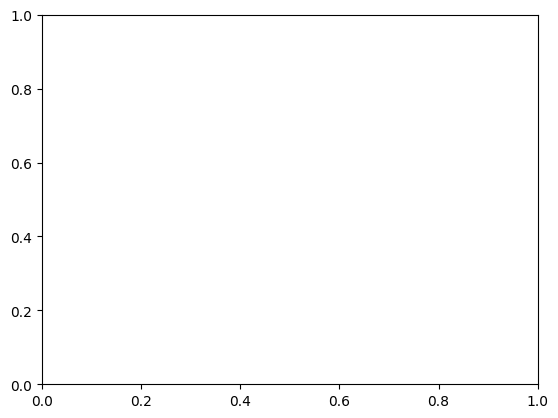

In [15]:
# {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, learning_curve
import matplotlib.pyplot as plt
svm1=svm.SVC(C=0.1, gamma=0.11, kernel = 'poly')
# x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size= 0.9)

num_epochs = 100
history = []


# Plot accuracy over epochs
plt.plot(np.arange(num_epochs), history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


# svm1.fit(x_train, y_train)
# train_pred= svm1.predict(x_train)
# print(classification_report(y_train, train_pred))
# print('=======================================================')
# test_pred= svm1.predict(x_test)
# print(classification_report(y_test, test_pred))


In [24]:
svm3=svm.SVC(C=10, gamma=0.1, kernel = 'rbf')
svm3.fit(x_train, y_train)
y_pred= svm3.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.65      0.53      0.58       102
         2.0       0.53      0.55      0.54       187
         3.0       0.43      0.59      0.50       118
         4.0       0.62      0.52      0.57       193

    accuracy                           0.55       600
   macro avg       0.56      0.55      0.55       600
weighted avg       0.56      0.55      0.55       600



In [102]:
# from sklearn.metrics import confusion_matrix#, precision, recall, f1_score, balanced_accuracy
y_pred = classifier.predict(x_train)
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[462  22   1  15]
 [ 29 828   5 138]
 [  5  43 448 104]
 [  4  49   3 944]]


[[257 146  55  42]
 [106 548  93 253]
 [ 25 146 232 197]
 [ 49 245  27 679]]